# Example of geostrophic kinematic deformation reconstruction 
## from NATL60 SSH map in Azores region

In [1]:
import numpy as np
import pylab as plt
import sys, os 
import xarray as xr 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import or3d.class_vertical_reconstruction as vr

## 1. Download SSH field and depth

In [3]:
path_ssh = '../data/Surf_fields/NATL60OSMO-CJM165_y2012m06d14-y2013m10d01.1d_SST-SSH.nc'    
with xr.open_dataset(path_ssh, mask_and_scale=True) as (ds_2):   
        ssh = np.zeros_like(ds_2.sossheig[0,20:-20,20:-20])#153:-153,165:-164])  
        day0 = 215 # y2013m01d15
        ssh[:,:] = ds_2.sossheig[day0,20:-20,20:-20]#153:-153,165:-164] 
        sst = np.zeros_like(ds_2.sosstsst[0,20:-20,20:-20])#153:-153,165:-164])  
        day0 = 215 # y2013m01d15
        sst[:,:] = ds_2.sosstsst[day0,20:-20,20:-20]#153:-153,165:-164] 
        lon = np.zeros_like(ds_2.nav_lon[20:-20,20:-20])#153:-153,165:-164] )   
        lon[:,:] = ds_2.nav_lon[20:-20,20:-20]#153:-153,165:-164]   
        lat = np.zeros_like(ds_2.nav_lat[20:-20,20:-20])#153:-153,165:-164] )   
        lat[:,:] = ds_2.nav_lat[20:-20,20:-20]#153:-153,165:-164]    
ssh = np.ma.masked_invalid(ssh)
sst = np.ma.masked_invalid(sst)

depth = []
with open('../data/NATL60_depth.txt') as fp:
    for cnt, line in enumerate(fp):
        if cnt != 0 and cnt < 109:
            depth.append(np.float(line.strip()))
            
np.shape(ssh)

(866, 489)

## 2. Create an ocean reconstruction instance

In [4]:
my_geokindef_reconstruction = vr.vertical_reconstruction()

## 3. Enter reconstruction parameters

In [5]:
my_geokindef_reconstruction.ssh = ssh 
my_geokindef_reconstruction.sst = sst
my_geokindef_reconstruction.lon = lon
my_geokindef_reconstruction.lat = lat                   

## 4. Run the geostrophic kinematic deformation reconstruction 

In [6]:
my_geokindef_reconstruction.run_geokindef()

## 5. Plot the reconstructed variables

Plotting surface variable
SSD anomaly is not available for plotting
Plotting 3D variables
Stream function is not available for plotting
Relative vorticity is not available for plotting
Buoyancy is not available for plotting
Vertical velocity (10$^{-3}$) is not available for plotting


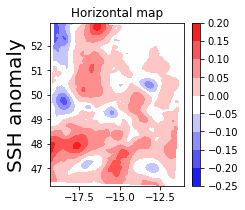

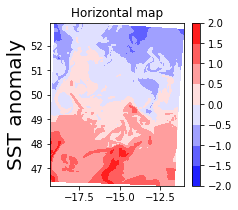

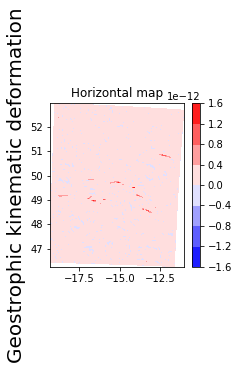

In [7]:
my_geokindef_reconstruction.plot_reconstruction_outputs(crop1 = 100, crop2 = -200, crop3 = 20, crop4 = -20)

## 6. Compare reconstructed w to the reference

In [15]:
depth[10]

-17.12431

In [16]:
path_ref = '../data/Reference/NATL60OSM-CJM165_y2013m01d15.1d_W.nc'    
with xr.open_dataset(path_ref, mask_and_scale=True) as (ds_2):   
        w_ref = np.zeros_like(ds_2.vovecrtz[0,0,:,:])    
        w_ref[:,:] = np.mean(ds_2.vovecrtz[0:24,10,:,:] ,0)
        lon_ref = np.zeros_like(ds_2.nav_lon[:,:] )   
        lon_ref[:,:] = ds_2.nav_lon[:,:]   
        lat_ref = np.zeros_like(ds_2.nav_lat[:,:] )   
        lat_ref[:,:] = ds_2.nav_lat[:,:]    
        
w_ref = np.ma.masked_invalid(w_ref)

ncrop5 = 2
ncrop6 = -161
ncrop7 = 69
ncrop8 = -149

In [17]:
crop1 = 100+153-18
crop2 = -200-153+22
crop3 = 20+165-24
crop4 = -20-164+16

Text(0.5,1,'Vertical velocity (10$^{-3}$m/s) at -17 m')

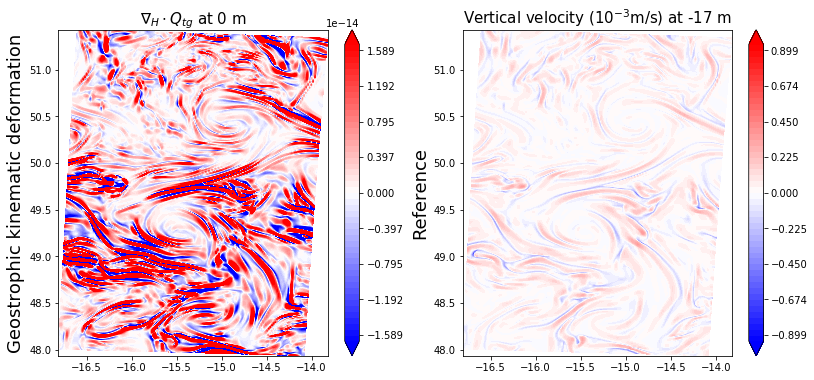

In [20]:
plt.figure(figsize=(35,6))
max_var0 = np.max(np.abs(my_geokindef_reconstruction.geokindef[ncrop5:ncrop6,ncrop7:ncrop8]))
#max_var = np.max(np.abs(my_esqg_reconstruction.vertvel[crop1:crop2,crop3:crop4,10]))
levs0 = np.linspace(-max_var0*0.01,max_var0*0.01, 51)
plt.subplot(151)
plt.contourf(my_geokindef_reconstruction.lon[crop1:crop2,crop3:crop4],my_geokindef_reconstruction.lat[crop1:crop2,crop3:crop4],my_geokindef_reconstruction.geokindef[crop1:crop2,crop3:crop4],cmap=plt.cm.get_cmap('bwr'),levels=levs0,extend='both')
plt.colorbar() 
plt.ylabel('Geostrophic kinematic deformation',fontsize=18)
plt.title(r'$\nabla_H \cdot Q_{tg}$ at 0 m',fontsize=15) 
 
max_var = np.max(np.abs(w_ref[ncrop5:ncrop6,ncrop7:ncrop8]*1e3))
levs = np.linspace(-max_var,max_var, 51) 
plt.subplot(152)
plt.contourf(lon_ref[ncrop5:ncrop6,ncrop7:ncrop8],lat_ref[ncrop5:ncrop6,ncrop7:ncrop8],w_ref[ncrop5:ncrop6,ncrop7:ncrop8]*1e3,cmap=plt.cm.get_cmap('bwr'),levels=levs,extend='both')
plt.colorbar() 
plt.ylabel('Reference',fontsize=18)
plt.title('Vertical velocity (10$^{-3}$m/s) at -17 m',fontsize=15) 
 